In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
tot_df = pd.read_csv("../chapter_0/laboratorio_didattico/MehrSongSpelke_exp_1.csv")

In [4]:
type(tot_df)

pandas.core.frame.DataFrame

In [5]:
print(*tot_df.columns)

id study_code exp1 exp2 exp3 exp4 exp5 dob dot1 dot2 dot3 female dad train Baseline_Proportion_Gaze_to_Singer Familiarization_Gaze_to_Familiar Familiarization_Gaze_to_Unfamiliar Test_Proportion_Gaze_to_Singer Difference_in_Proportion_Looking Estimated_Total_Number_of_Song totskypesing stim othersing comply_no module skype_before ammat ammar ammatot ammapr ipad_num famtot_6 unfamtot_6 totprac totw totnw age length delay mtotsing mbabylike msingcomf mtotrecord m_othersong pright diarymissing comply_fup survey_completion smsingrate smtalkrate gzsingrate gztalkrate famtot unfamtot totsing1 babylike1 singcomf1 totrecord1 othersong1 dtword1 dtnoword1 totsing2 babylike2 singcomf2 totrecord2 othersong2 dtword2 dtnoword2 totsing3 babylike3 singcomf3 totrecord3 othersong3 dtword3 dtnoword3 totsing4 babylike4 singcomf4 totrecord4 othersong4 dtword4 dtnoword4 totsing5 babylike5 singcomf5 totrecord5 othersong5 dtword5 dtnoword5 totsing6 babylike6 singcomf6 totrecord6 othersong6 dtword6 dtnoword6 to

In [6]:
tot_df.shape

(96, 153)

In [7]:
tot_df["exp1"]

0     1
1     1
2     1
3     1
4     1
     ..
91    0
92    0
93    0
94    0
95    0
Name: exp1, Length: 96, dtype: int64

In [8]:
tot_df.exp1

0     1
1     1
2     1
3     1
4     1
     ..
91    0
92    0
93    0
94    0
95    0
Name: exp1, Length: 96, dtype: int64

In [9]:
tot_df["exp1"].unique()

array([1, 0])

In [10]:
temp = tot_df[["exp1", "female", "stim", "age", "Test_Proportion_Gaze_to_Singer"]]
temp.head()

,exp1,female,stim,age,Test_Proportion_Gaze_to_Singer
0,1,0,"""C1""",5.848049,0.602740
1,1,0,"""C1""",5.979466,0.683027
2,1,0,"""C2""",5.749486,0.724138
3,1,1,"""C3""",5.913758,0.281654
4,1,1,"""C4""",5.946612,0.498542


In [11]:
df = temp[temp["exp1"] == 1]
temp.head()

,exp1,female,stim,age,Test_Proportion_Gaze_to_Singer
0,1,0,"""C1""",5.848049,0.602740
1,1,0,"""C1""",5.979466,0.683027
2,1,0,"""C2""",5.749486,0.724138
3,1,1,"""C3""",5.913758,0.281654
4,1,1,"""C4""",5.946612,0.498542


In [12]:
df = df.drop(columns=["exp1"])
df.head()

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
1,0,"""C1""",5.979466,0.683027
2,0,"""C2""",5.749486,0.724138
3,1,"""C3""",5.913758,0.281654
4,1,"""C4""",5.946612,0.498542


In [13]:
df.tail()

,female,stim,age,Test_Proportion_Gaze_to_Singer
27,1,"""C4""",5.355236,0.531100
28,0,"""C8""",5.223819,0.541899
29,1,"""C5""",6.045175,0.700389
30,1,"""C4""",5.848049,0.762963
31,1,"""C6""",5.420945,0.460274


In [14]:
df.shape

(32, 4)

In [15]:
df.dtypes

female                              int64
stim                               object
age                               float64
Test_Proportion_Gaze_to_Singer    float64
dtype: object

In [16]:
df.loc[0]

female                                   0
stim                                  "C1"
age                               5.848049
Test_Proportion_Gaze_to_Singer     0.60274
Name: 0, dtype: object

In [17]:
df.loc[31]

female                                   1
stim                                  "C6"
age                               5.420945
Test_Proportion_Gaze_to_Singer    0.460274
Name: 31, dtype: object

In [18]:
df.loc[0:4]

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
1,0,"""C1""",5.979466,0.683027
2,0,"""C2""",5.749486,0.724138
3,1,"""C3""",5.913758,0.281654
4,1,"""C4""",5.946612,0.498542


In [19]:
df.tail()

,female,stim,age,Test_Proportion_Gaze_to_Singer
27,1,"""C4""",5.355236,0.531100
28,0,"""C8""",5.223819,0.541899
29,1,"""C5""",6.045175,0.700389
30,1,"""C4""",5.848049,0.762963
31,1,"""C6""",5.420945,0.460274


In [20]:
df.loc[[0, 3, 6, 9]]

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
3,1,"""C3""",5.913758,0.281654
6,1,"""C6""",5.486653,0.417755
9,1,"""C1""",5.420945,0.586294


In [21]:
df.iloc[[0, 3, 6, 9]]

,female,stim,age,Test_Proportion_Gaze_to_Singer
0,0,"""C1""",5.848049,0.602740
3,1,"""C3""",5.913758,0.281654
6,1,"""C6""",5.486653,0.417755
9,1,"""C1""",5.420945,0.586294


In [22]:
df.iloc[:, [0, 2]].head()

,female,age
0,0,5.848049
1,0,5.979466
2,0,5.749486
3,1,5.913758
4,1,5.946612


In [23]:
df["Test_Proportion_Gaze_to_Singer"].mean()

0.59349125

In [24]:
df["Test_Proportion_Gaze_to_Singer"].std(ddof=0)

0.17587420037119572

In [25]:
summary_stats = ['min', 'median', 'mean', 'std', 'max']
result = df[["age", "Test_Proportion_Gaze_to_Singer"]].aggregate(summary_stats)
print(result)

             age  Test_Proportion_Gaze_to_Singer
min     5.059548                        0.262846
median  5.700205                        0.556953
mean    5.612936                        0.593491
std     0.312476                        0.178688
max     6.110883                        0.950920


In [26]:
summary_stats = ['min', 'median', 'mean', 'std', 'max']
result = df.groupby("female")[["age", "Test_Proportion_Gaze_to_Singer"]].aggregate(summary_stats)
print(result)

             age                                         \
             min    median      mean      std       max   
female                                                    
0       5.059548  5.749486  5.563313  0.35660  6.110883   
1       5.256673  5.552361  5.656722  0.27123  6.110883   

       Test_Proportion_Gaze_to_Singer                                          
                                  min    median      mean       std       max  
female                                                                         
0                            0.262846  0.542105  0.607096  0.214455  0.950920  
1                            0.281654  0.571801  0.581487  0.145927  0.811189  


In [27]:
summary_stats = (
    df.loc[:, ["female", "age", "Test_Proportion_Gaze_to_Singer"]]
    .groupby(["female"])
    .aggregate(["min", "median", "mean", "std", "max"])  # Use string names of the functions
)
summary_stats.round(2)

age                          Test_Proportion_Gaze_to_Singer         \
         min median  mean   std   max                            min median   
female                                                                        
0       5.06   5.75  5.56  0.36  6.11                           0.26   0.54   
1       5.26   5.55  5.66  0.27  6.11                           0.28   0.57   

                          
        mean   std   max  
female                    
0       0.61  0.21  0.95  
1       0.58  0.15  0.81

In [28]:
df.groupby(["female"]).size()

female
0    15
1    17
dtype: int64

In [29]:
df["age"] 

0     5.848049
1     5.979466
2     5.749486
3     5.913758
4     5.946612
5     5.749486
6     5.486653
7     5.749486
8     6.110883
9     5.420945
10    6.110883
11    5.552361
12    5.749486
13    5.782341
14    5.815195
15    5.158111
16    5.256673
17    5.059548
18    5.190965
19    5.880904
20    5.256673
21    5.289528
22    5.552361
23    5.552361
24    5.650924
25    5.092402
26    5.815195
27    5.355236
28    5.223819
29    6.045175
30    5.848049
31    5.420945
Name: age, dtype: float64

In [30]:
df["age_deciles"] = pd.qcut(df["age"], 5, labels=False)
df["age_deciles"]

0     3
1     4
2     2
3     4
4     4
5     2
6     1
7     2
8     4
9     1
10    4
11    1
12    2
13    3
14    3
15    0
16    0
17    0
18    0
19    4
20    0
21    1
22    1
23    1
24    2
25    0
26    3
27    1
28    0
29    4
30    3
31    1
Name: age_deciles, dtype: int64

In [31]:
prop_by_age = df.groupby('age_deciles')['Test_Proportion_Gaze_to_Singer'].mean()
prop_by_age

age_deciles
0    0.453139
1    0.584660
2    0.758172
3    0.722895
4    0.533876
Name: Test_Proportion_Gaze_to_Singer, dtype: float64

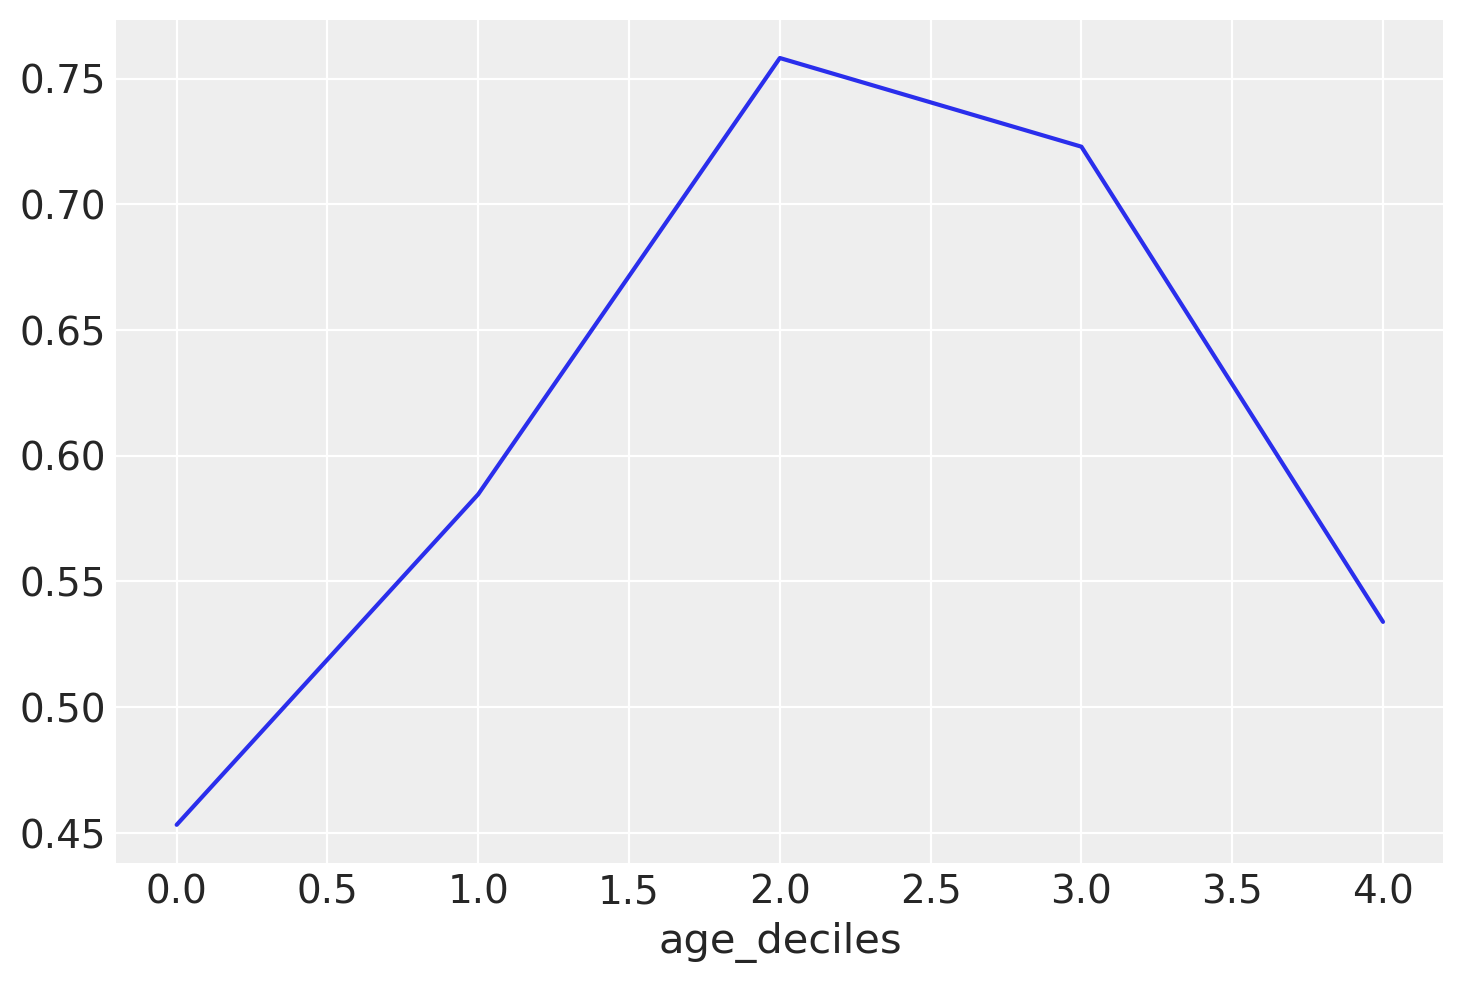

In [32]:
prop_by_age.plot();

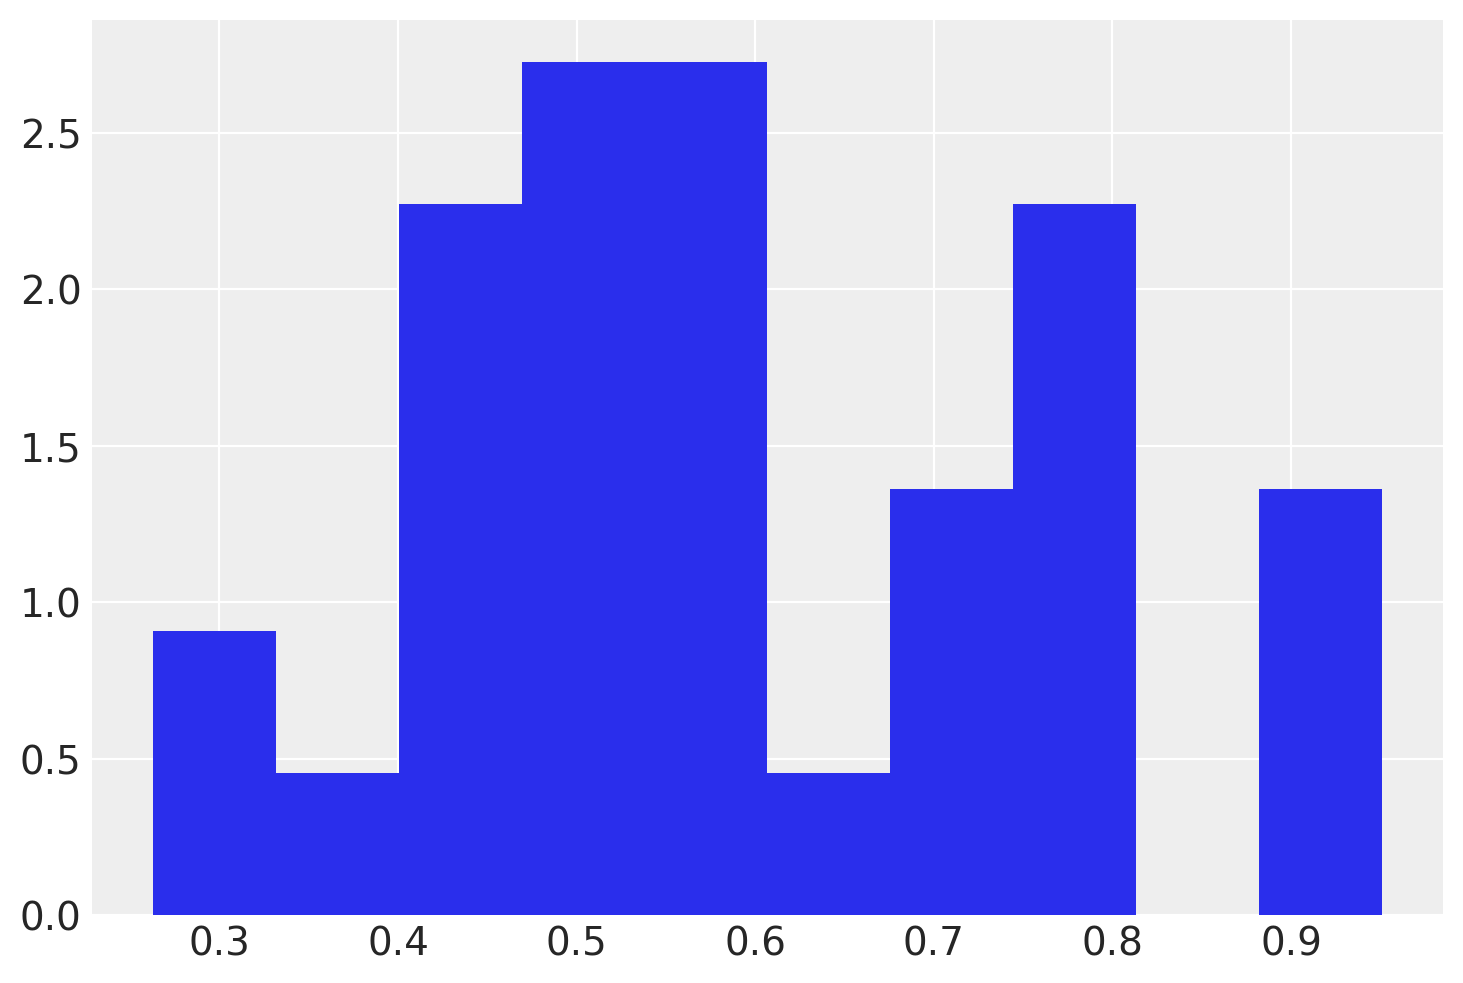

In [33]:
plt.hist(df["Test_Proportion_Gaze_to_Singer"], density=True);

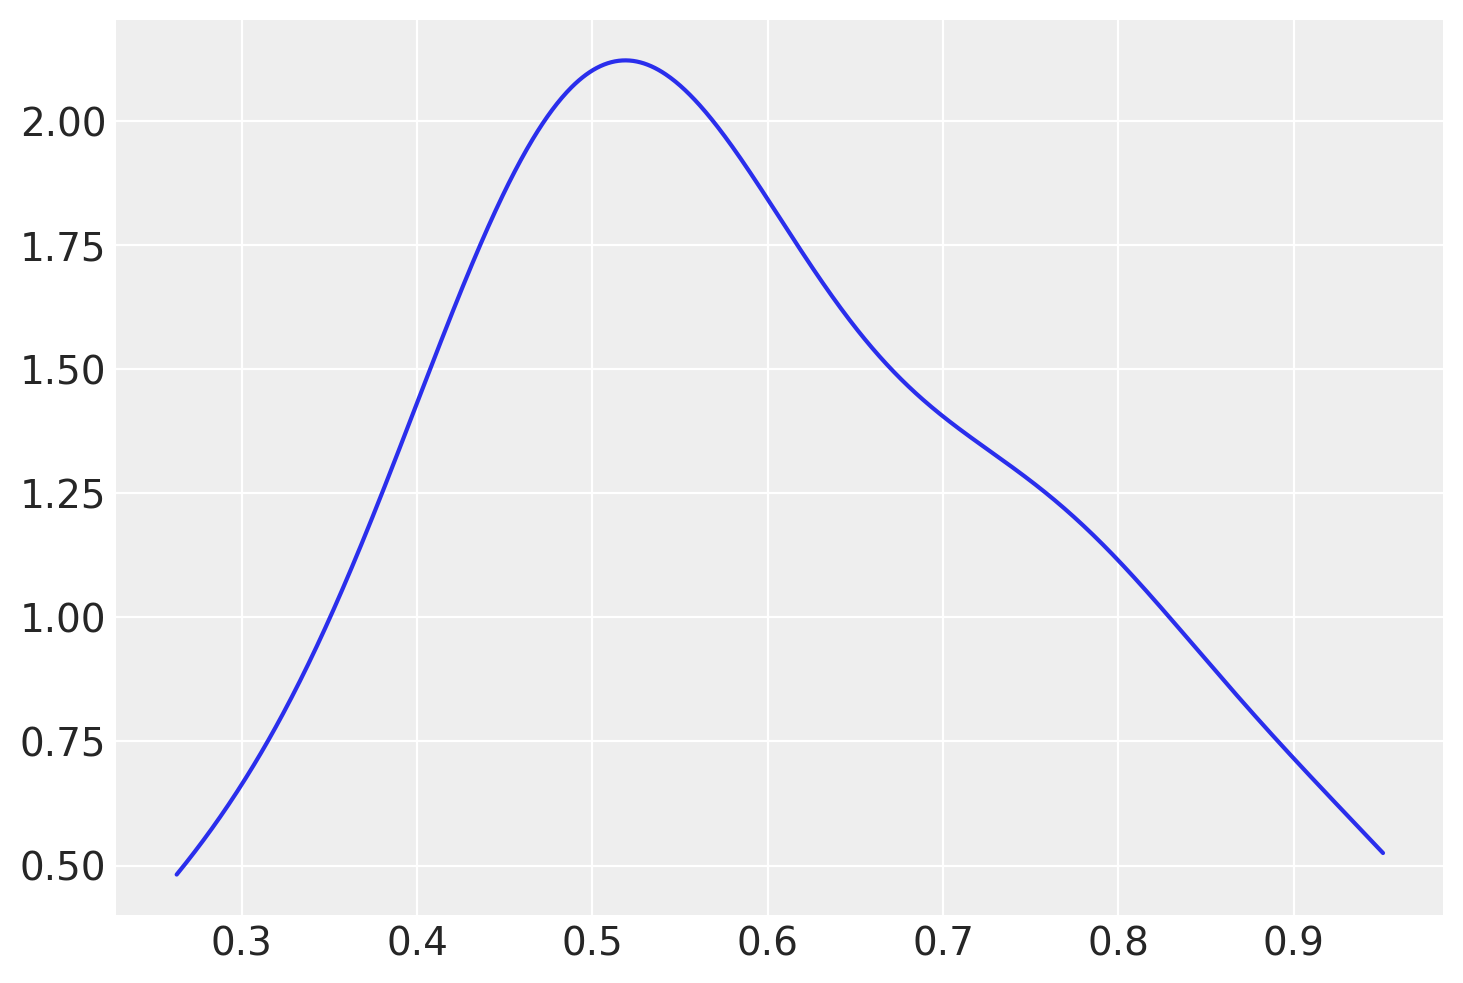

In [34]:
density = stats.gaussian_kde(df["Test_Proportion_Gaze_to_Singer"])
xs = np.linspace(min(df["Test_Proportion_Gaze_to_Singer"]), max(df["Test_Proportion_Gaze_to_Singer"]), 1000)
plt.plot(xs, density(xs));

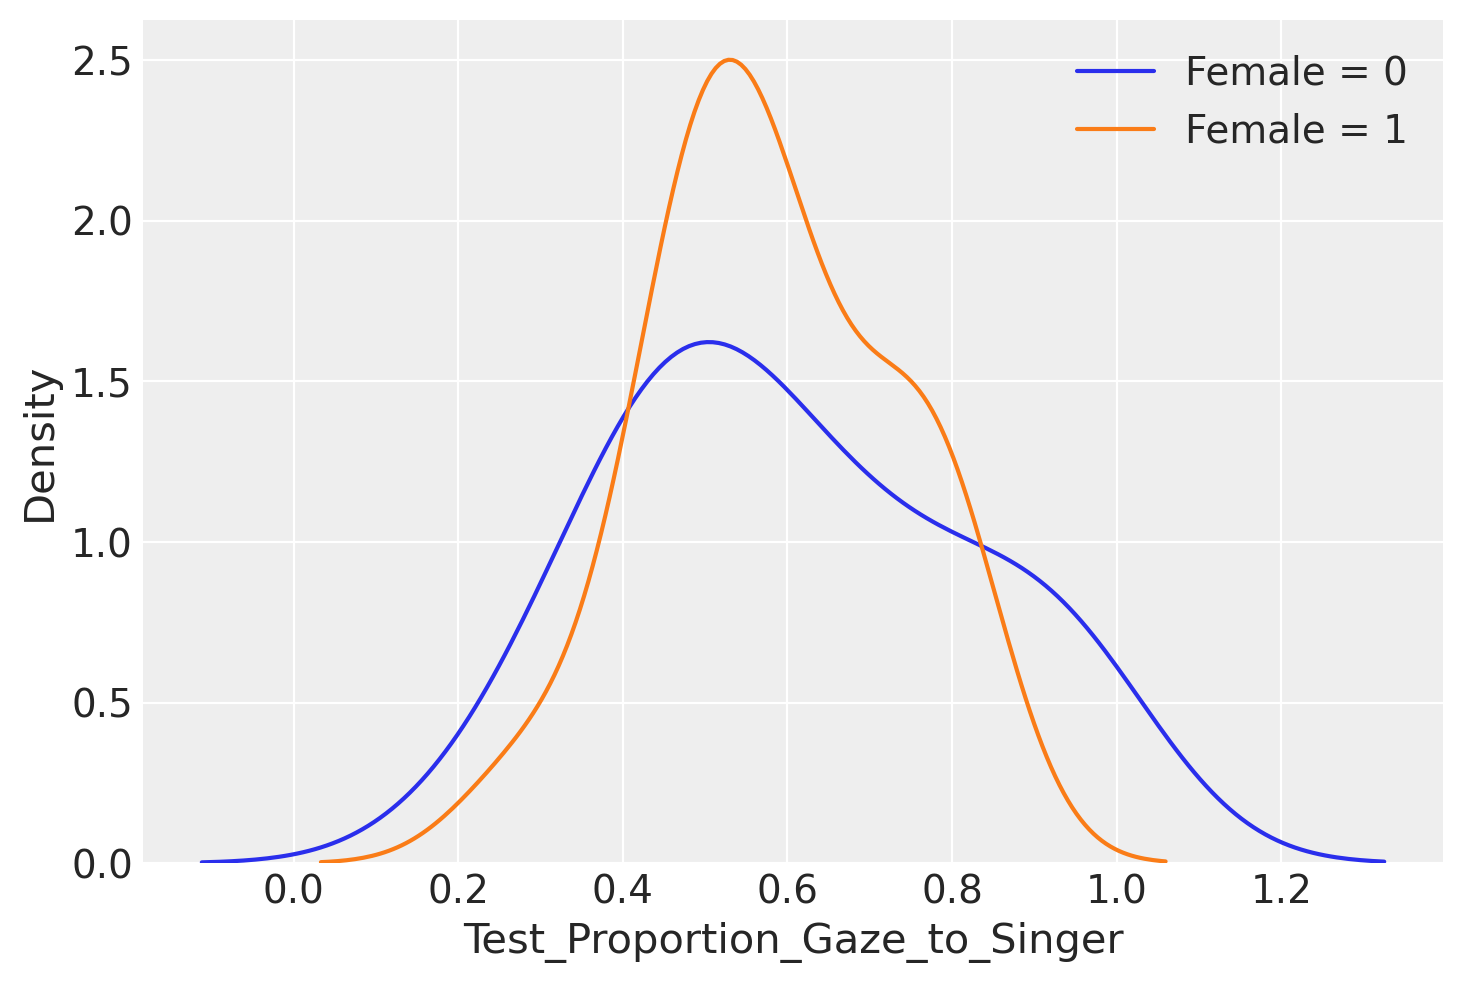

In [35]:
# KDE plot for female = 0 (or the first level)
sns.kdeplot(df[df["female"] == 0]["Test_Proportion_Gaze_to_Singer"], label='Female = 0')
# KDE plot for female = 1 (or the second level)
sns.kdeplot(df[df["female"] == 1]["Test_Proportion_Gaze_to_Singer"], label='Female = 1')
plt.legend();

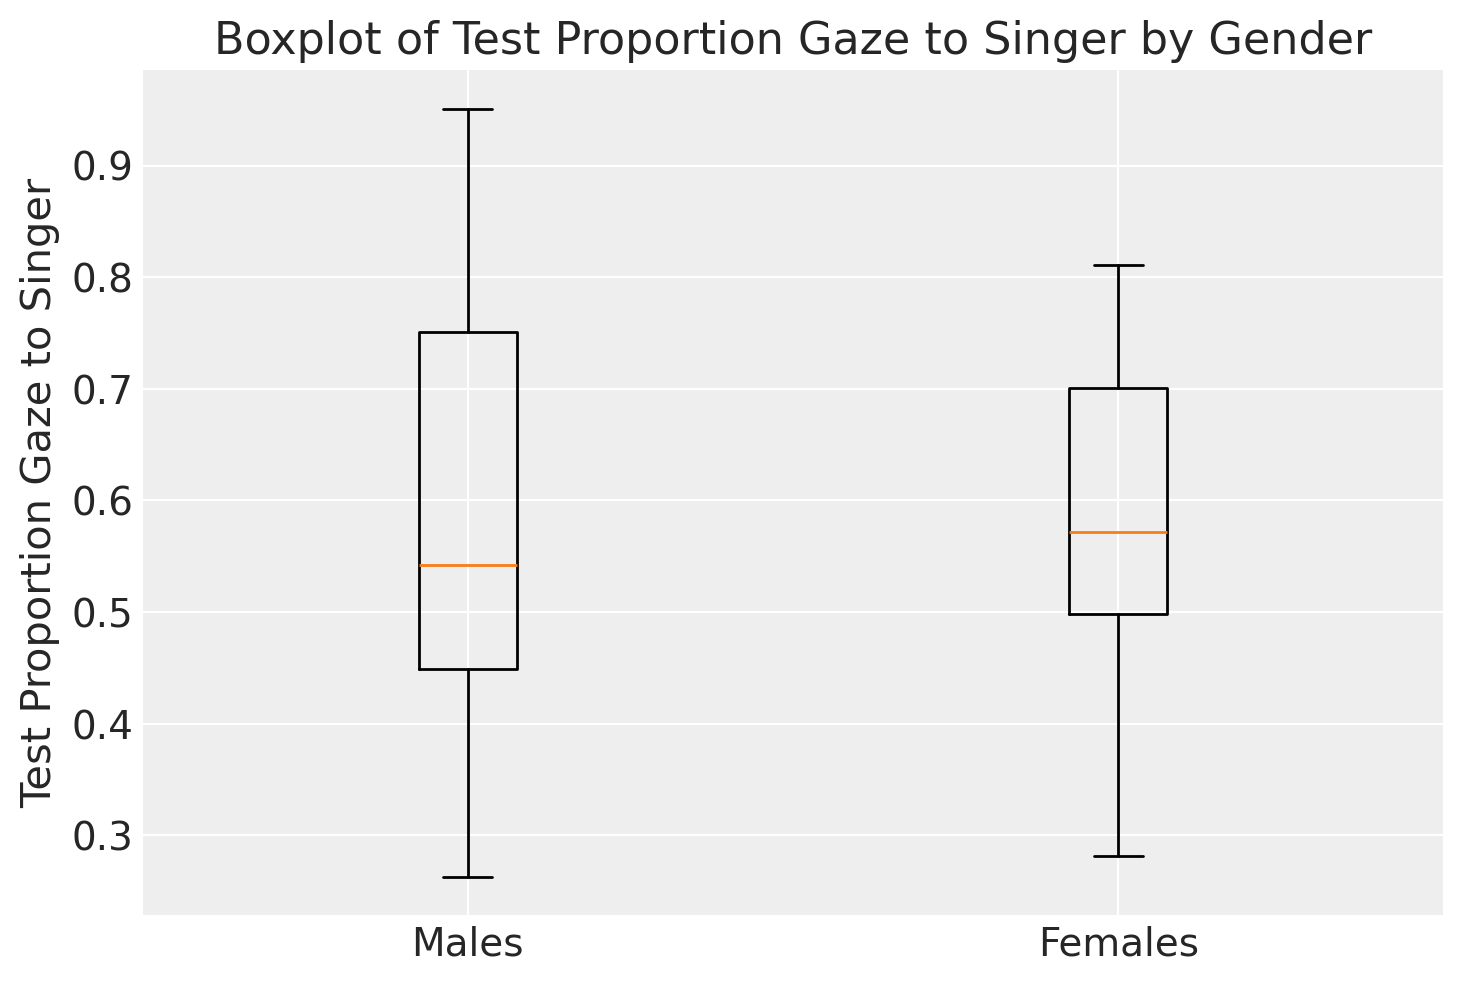

In [36]:
# Filter the data by the levels of the "female" variable
female_0 = df[df["female"] == 0]["Test_Proportion_Gaze_to_Singer"]
female_1 = df[df["female"] == 1]["Test_Proportion_Gaze_to_Singer"]

# Combine the filtered data
data = [female_0, female_1]

# Plot the boxplots
plt.boxplot(data, labels=['Males', 'Females'])

plt.title('Boxplot of Test Proportion Gaze to Singer by Gender')
plt.ylabel('Test Proportion Gaze to Singer');

In [37]:
female_0

0     0.602740
1     0.683027
2     0.724138
5     0.950920
7     0.938202
8     0.500000
14    0.777448
15    0.262846
17    0.436975
18    0.542105
20    0.418675
24    0.366412
25    0.461539
26    0.899521
28    0.541899
Name: Test_Proportion_Gaze_to_Singer, dtype: float64

In [38]:
np.median(female_0)

0.5421053

In [39]:
np.quantile(female_0, [0.25, 0.75])

array([0.44925665, 0.750793  ])

In [40]:
iqr = np.quantile(female_0, 0.75) - np.quantile(female_0, 0.25)
iqr

0.30153635

In [41]:
lim_inf = np.quantile(female_0, 0.25) - 1.5*iqr
lim_inf

-0.0030478749999999777

In [42]:
lim_sup = np.quantile(female_0, 0.75) + 1.5*iqr
lim_sup

1.203097525

In [43]:
# Trovare i valori anomali
valori_anomali = female_0[(female_0 < lim_inf) | (female_0 > lim_sup)]

len(valori_anomali)

0